In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
from __future__ import print_function
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [79]:
!ls ../tfhub/inference

inception_v3  mobilenet_v1_025_128  mobilenet_v2_100_128  nasnet_mobile


In [113]:
def draw_contour(mask, rgb):
    if rgb.shape[0] != mask.shape[0]:
        x_, y_ = mask.shape[:2]
        rgb = cv2.resize(rgb, dsize=(y_, x_))
    mask = (mask != 6).astype(np.uint8)
    print(mask.shape, rgb.shape)
    im2, contours, hierarchy = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)    
#     print(contours)
    rgb2 = np.copy(rgb)
    cv2.drawContours(rgb2, contours, 0, (0,0,0), 5)
    return rgb2

def draw_contour_all(mask, rgb):
    mask = (mask != 6).astype(np.uint8)
    print(mask.shape, rgb.shape)
    im2, contours, hierarchy = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)    
#     print(contours)
    rgb2 = np.copy(rgb)
    cv2.drawContours(rgb2, contours, -1, (0,0,0), 3)
    return rgb2

In [2]:
mask_list = glob.glob('../data/wsi_annotation/*png')
mask_paths = pd.DataFrame(mask_list, index=[os.path.basename(x).replace('.png', '') for x in mask_list])
mask_paths

,0
1305474,../data/wsi_annotation/1305474.png
1304700,../data/wsi_annotation/1304700.png
1304730,../data/wsi_annotation/1304730.png
1305459,../data/wsi_annotation/1305459.png
1305495,../data/wsi_annotation/1305495.png
1305445,../data/wsi_annotation/1305445.png
1305453,../data/wsi_annotation/1305453.png
1304711,../data/wsi_annotation/1304711.png
1305450,../data/wsi_annotation/1305450.png
1305481,../data/wsi_annotation/1305481.png


31
../tfhub/inference/inception_v3/1304732_prob.npy 1304732
(76, 116) [  0 255]
(76, 116) (76, 116, 3)


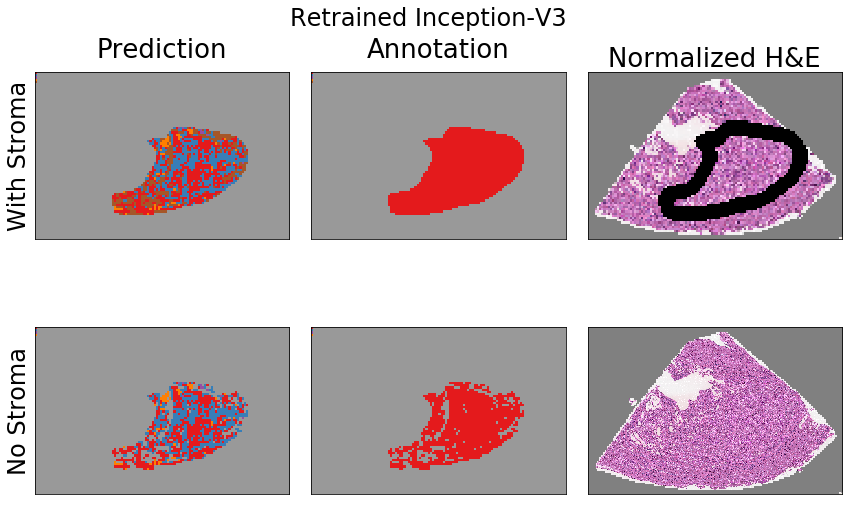

In [115]:
inf_list = glob.glob('../tfhub/inference/inception_v3/*npy')

# inf_list = glob.glob('../unet/10x/inference/*npy')

rgb_list = glob.glob('../unet/10x/inference/*rgb.jpg')
rgb_paths = pd.DataFrame(rgb_list, index=[os.path.basename(x).replace('_rgb.jpg', '') for x in rgb_list])
print(len(inf_list))

# inf_path = np.random.choice(inf_list,1)[0]
inf_path = '../tfhub/inference/inception_v3/1304732_prob.npy'
inf_base = os.path.basename(inf_path).replace('_prob.npy', '')
print(inf_path, inf_base)

x = np.load(inf_path)
mask = cv2.imread(mask_paths.loc[inf_base,0], -1)
rgb = cv2.imread(rgb_paths.loc[inf_base,0], -1)[:,:,::-1]
x_, y_ = x.shape[:2]
mask = cv2.resize(mask, dsize=(y_, x_), interpolation=cv2.INTER_NEAREST)
print(mask.shape, np.unique(mask))

fig, axs = plt.subplots(2,3,figsize=(12, 8))
    
amax = np.argmax(x, axis=-1)
## Take away unannotated area
amax[mask==255] = 6
mask[mask==255] = 6

mask[0:5, 0] = np.arange(5)
amax[0:5, 0] = np.arange(5)

axs[0][0].matshow(amax, cmap='Set1')
axs[0][0].set_yticks([])
axs[0][0].set_xticks([])
axs[0][0].set_title('Prediction', fontsize=26)
axs[0][0].set_ylabel('With Stroma', fontsize=24)

axs[0][1].matshow(mask, cmap='Set1')
axs[0][1].set_yticks([])
axs[0][1].set_xticks([])
axs[0][1].set_title('Annotation', fontsize=26)

rgb_marked = draw_contour(mask, rgb)
axs[0][2].imshow(rgb_marked)
axs[0][2].set_yticks([])
axs[0][2].set_xticks([])
axs[0][2].set_title('Normalized H&E', fontsize=26)

## Take away stroma
mask[amax==4] = 6
amax[amax==4] = 6

# rgb_marked = draw_contour_all(mask, rgb)
axs[1][2].imshow(rgb)
axs[1][2].set_yticks([])
axs[1][2].set_xticks([])

axs[1][0].matshow(amax, cmap='Set1')
axs[1][0].set_yticks([])
axs[1][0].set_xticks([])
axs[1][0].set_ylabel('No Stroma', fontsize=24)

axs[1][1].matshow(mask, cmap='Set1')
axs[1][1].set_yticks([])
axs[1][1].set_xticks([])
plt.tight_layout()
plt.suptitle('Retrained Inception-V3', fontsize=24)
plt.savefig('/home/nathan/Dropbox/_papers/gleason_grade/wsi_pred_label_inception_v3.pdf', bbox_inches='tight')

In [99]:
inf_list = glob.glob('../unet/10x/inference/*npy')
print(len(inf_list))
attrib = ['Slide', 'TotalAcc', 'EpitheliumAcc']
performance = {k: [] for k in attrib}

for inf_path in inf_list:
    inf_base = os.path.basename(inf_path).replace('_prob.npy', '')
    print(inf_path, inf_base)

    x = np.load(inf_path)
    mask = cv2.imread(mask_paths.loc[inf_base,0], -1)
    x_, y_ = x.shape[:2]
    mask = cv2.resize(mask, dsize=(y_, x_), interpolation=cv2.INTER_NEAREST)

    amax = np.argmax(x, axis=-1)
    amax[mask==255] = 255

    ## pull out annotated area
    amax_annotated = amax[mask != 255]
    mask_annotated = mask[mask != 255]
    total_size = float(amax_annotated.shape[0])
    
    ## pull out non-stroma
    mask_annotated = mask_annotated[amax_annotated != 4]
    amax_annotated = amax_annotated[amax_annotated != 4]

    total_acc = (amax_annotated == mask_annotated).sum() / total_size
    epithelium_acc = (amax_annotated == mask_annotated).sum() / float(amax_annotated.shape[0])
    
    performance['Slide'].append(inf_base)
    performance['TotalAcc'].append(total_acc)
    performance['EpitheliumAcc'].append(epithelium_acc)
    
perf_df = pd.DataFrame(performance, index=performance['Slide'], columns=['TotalAcc', 'EpitheliumAcc'])


35
../unet/10x/inference/1305449_prob.npy 1305449
../unet/10x/inference/1304700_prob.npy 1304700
../unet/10x/inference/1304704_prob.npy 1304704
../unet/10x/inference/1305451_prob.npy 1305451
../unet/10x/inference/1304722_prob.npy 1304722
../unet/10x/inference/1304702_prob.npy 1304702
../unet/10x/inference/1304713_prob.npy 1304713
../unet/10x/inference/1304725_prob.npy 1304725
../unet/10x/inference/1304709_prob.npy 1304709
../unet/10x/inference/1305456_prob.npy 1305456
../unet/10x/inference/1305452_prob.npy 1305452
../unet/10x/inference/1304726_prob.npy 1304726
../unet/10x/inference/1305450_prob.npy 1305450
../unet/10x/inference/1304730_prob.npy 1304730
../unet/10x/inference/1304705_prob.npy 1304705
../unet/10x/inference/1304701_prob.npy 1304701
../unet/10x/inference/1305460_prob.npy 1305460
../unet/10x/inference/1305455_prob.npy 1305455
../unet/10x/inference/1304723_prob.npy 1304723
../unet/10x/inference/1305454_prob.npy 1305454
../unet/10x/inference/1305457_prob.npy 1305457
../unet/10